Importing Libraries
-numpy,pandas for data manuplation
-yfinance for stocks data you can also use nsepy
-matplotlib for visualization

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

So idea is here that first we will extract data then we will create our RSI indicator using close (Closing price) column 

In [2]:
df = yf.download('COLPAL.NS', period = '1y') #enter the name symbol stock anf followed by ".NS"
df['MOV200'] = df['Close'].rolling(20).mean()
df['price change'] = df['Close'].pct_change()
df['upmove']= df['price change'].apply(lambda x: x if x > 0 else 0)
df['downmove']= df['price change'].apply(lambda x: abs(x) if x < 0 else 0)
df['avg up']= df['upmove'].rolling(15).mean()
df['avg down']= df['downmove'].rolling(15).mean()
df['RS']= df['avg up']/df['avg down']
df['RSI']= 100-(100/(df['RS']+1))
df['RSIL'] = 35 #lower value of RSI for buy signal
df['RSIU'] = 75 #Upper value of RSI for sell signal
df=df.dropna()
df

[*********************100%***********************]  1 of 1 completed


Plotting the data

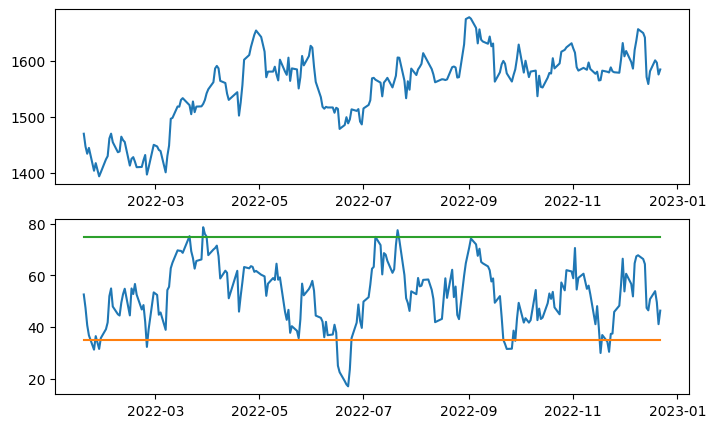

In [12]:
#fig = px.line(df, x="Date", y="Close")
#fig.show()
plt.figure(figsize=(18,5))
plt.subplot(2,2,1)
plt.plot(df['Close'])
plt.subplot(2,2,3)
plt.plot(df[['RSI', 'RSIL','RSIU']])
plt.show()

As we can clearly see below 20 there arnt many buy signals so we will use RSI 35.
Create buy and sell signal 

In [4]:
buy=[]
sell=[]
open_pos = False
for i in range(len(df)):
    if df.RSI[i] < df.RSIL[i]:
        if open_pos == False:
            buy.append(i)
            open_pos = True
    elif df.RSI[i] > df.RSIU[i]:
        if open_pos:
            sell.append(i)
            open_pos = False
#df.reset_index(inplace=True)            

Plotting buy and sell signal in same graph.

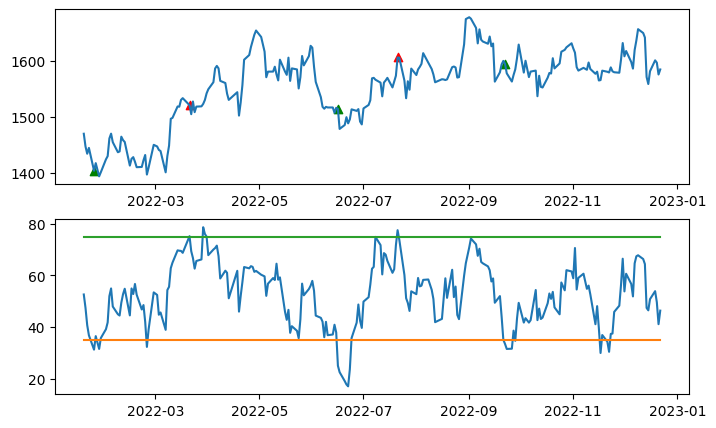

In [14]:
plt.figure(figsize = (18,5))
plt.subplot(2,2,1)
plt.scatter(df.iloc[buy].index, df.iloc[buy].Close, marker='^', color ='green')
plt.scatter(df.iloc[sell].index, df.iloc[sell].Close, marker='^', color ='red')
plt.plot(df['Close'])
plt.subplot(2,2,3)
plt.plot(df[['RSI', 'RSIL','RSIU']])
plt.show()

back testing strategy

In [15]:
merged = pd.concat([df.iloc[buy].Close,df.iloc[sell].Close],axis=1)
header = ['buy','sell']
merged.columns = header
profit = merged.shift(-1).sell - merged.buy
profit.mean()

104.39996337890625